# Boston Housing

In [42]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler        
from sklearn.metrics import r2_score


In [43]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [44]:
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')


Training data : (404, 13)
Test data : (102, 13)


In [62]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [73]:
model = Sequential()
model.add(Dense(units = 256, input_dim=scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 56, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(units = 28, activation='relu'))
model.add(Dropout(0.2))        
model.add(Dense(units = 1))
        

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()
        
history = model.fit(train_data, train_targets, epochs=500, batch_size=32, verbose = 0,  validation_split=0.20)        

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 256)               3584      
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 56)                7224      
_________________________________________________________________
dropout_36 (Dropout)         (None, 56)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 28)               

In [75]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


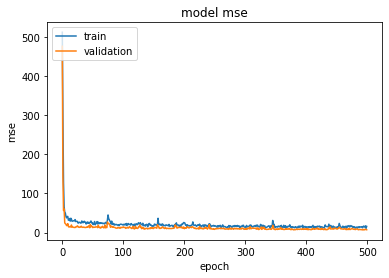

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


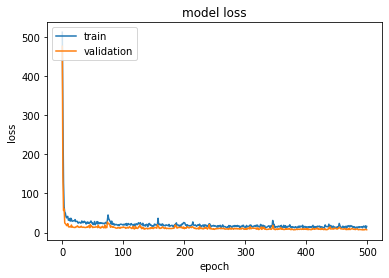

In [76]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path1.eps', format='eps', dpi=1000)
plt.show()

In [77]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 12.9333 - mse: 12.9333


In [78]:
pred = model.predict(test_data)
r2 = r2_score(test_targets, pred)

        
print(); print('Evaluation of the trained model: ')
print(); print('R2 Score : ', r2)


Evaluation of the trained model: 

R2 Score :  0.8446334324203618


# Breast Cancer Wisconsin

In [124]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')

In [125]:
import numpy as np
import pandas as pd

In [126]:
df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_size','bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']

In [127]:
df.drop(['id'], inplace=True, axis=1)

In [128]:
df.replace('?', -99999, inplace=True)

In [129]:
y = np.array(df['class'])

In [130]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [131]:
X = np.array(df.drop(['class'], axis=1))


In [132]:
scaler = preprocessing.MinMaxScaler()

In [133]:
X = scaler.fit_transform(X)

In [137]:
 X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.2, random_state=1)

In [138]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow as tf

In [155]:
model = Sequential()
model.add(Dense(units = 64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 16, activation='relu'))
model.add(Dropout(0.2))      
model.add(Dense(units = 1,  activation='sigmoid'))

In [156]:
model.compile( optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [157]:
history=model.fit(X_train, y_train, batch_size=30, epochs=200, verbose=1, validation_split=0.20)

Epoch 1/200
15/15 [==============================] - 1s 17ms/step - loss: 0.6806 - accuracy: 0.6658 - val_loss: 0.6457 - val_accuracy: 0.7500
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.6393 - accuracy: 0.7477 - val_loss: 0.5798 - val_accuracy: 0.9018
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.5808 - accuracy: 0.8499 - val_loss: 0.4814 - val_accuracy: 0.9732
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.4813 - accuracy: 0.8837 - val_loss: 0.3433 - val_accuracy: 0.9732
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.3589 - accuracy: 0.9231 - val_loss: 0.1964 - val_accuracy: 0.9821
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.9165 - val_loss: 0.1095 - val_accuracy: 0.9821
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.1815 - accuracy: 0.9454 - val_loss: 0.0789 - val_accuracy: 0.9821
Epoch 8/200


In [158]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


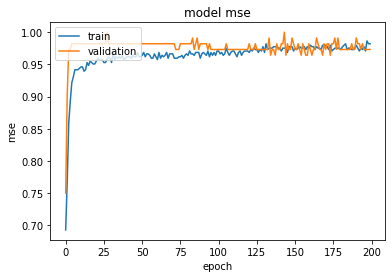

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


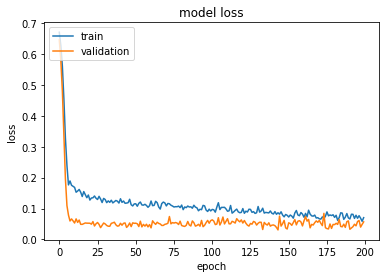

In [159]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path1.eps', format='eps', dpi=1000)
plt.show()